In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('feature.csv',index_col=-1)
print(df.head())

       Cured  Confirmed  Deaths  mortal_rate  cured_rate  \
index                                                      
0          0          1       0          0.0         0.0   
1          0          1       0          0.0         0.0   
2          0          2       0          0.0         0.0   
3          0          3       0          0.0         0.0   
4          0          3       0          0.0         0.0   

       confirmation_increase_rate  cured_increase_rate  Kerala_con  \
index                                                                
0                        0.000000                  0.0           1   
1                        0.000000                  0.0           1   
2                        0.500000                  0.0           2   
3                        0.333333                  0.0           3   
4                        0.000000                  0.0           3   

       Kerala_death  Kerala_rec  ...  Dadar Nagar Haveli_con  \
index                   

In [3]:
y=df[["Confirmed","Deaths","Cured"]].values

In [4]:
df_k=df.drop(["Confirmed","Deaths","Cured"],axis=1)

In [5]:
X=df_k.values

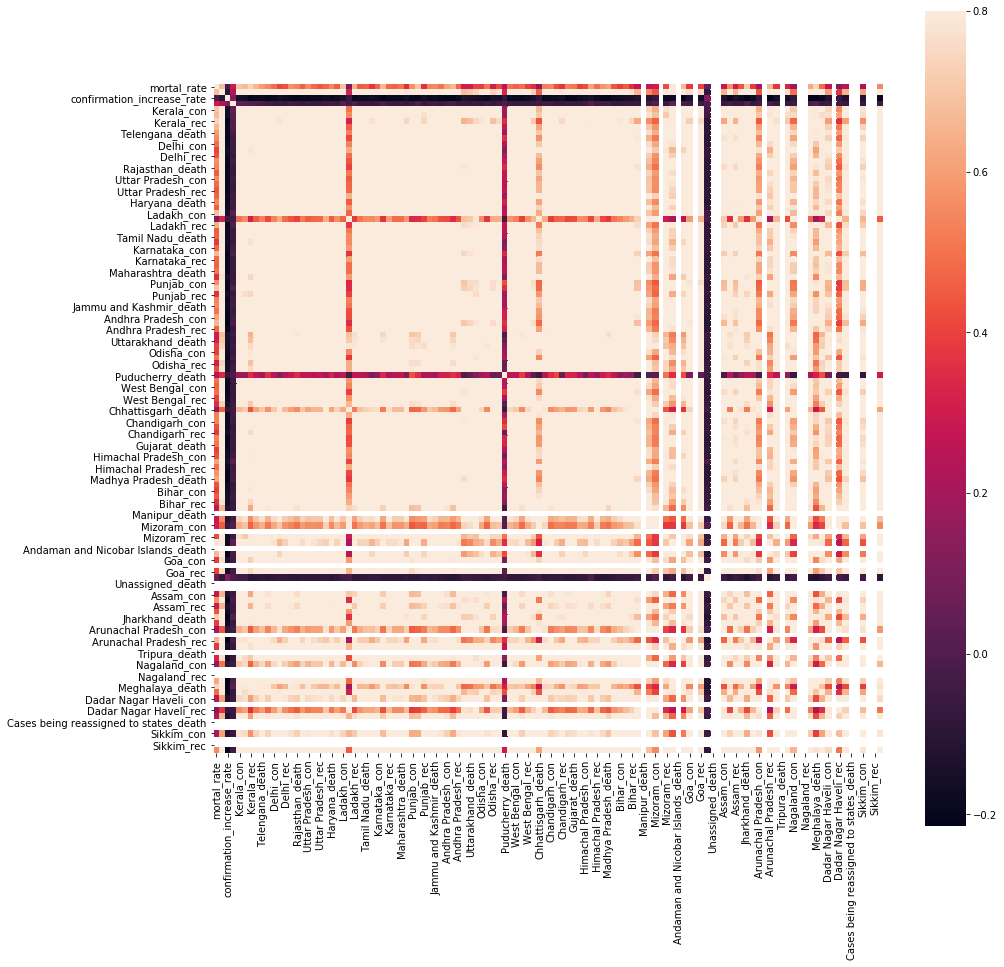

In [8]:
import seaborn as sb
C_mat = df_k.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

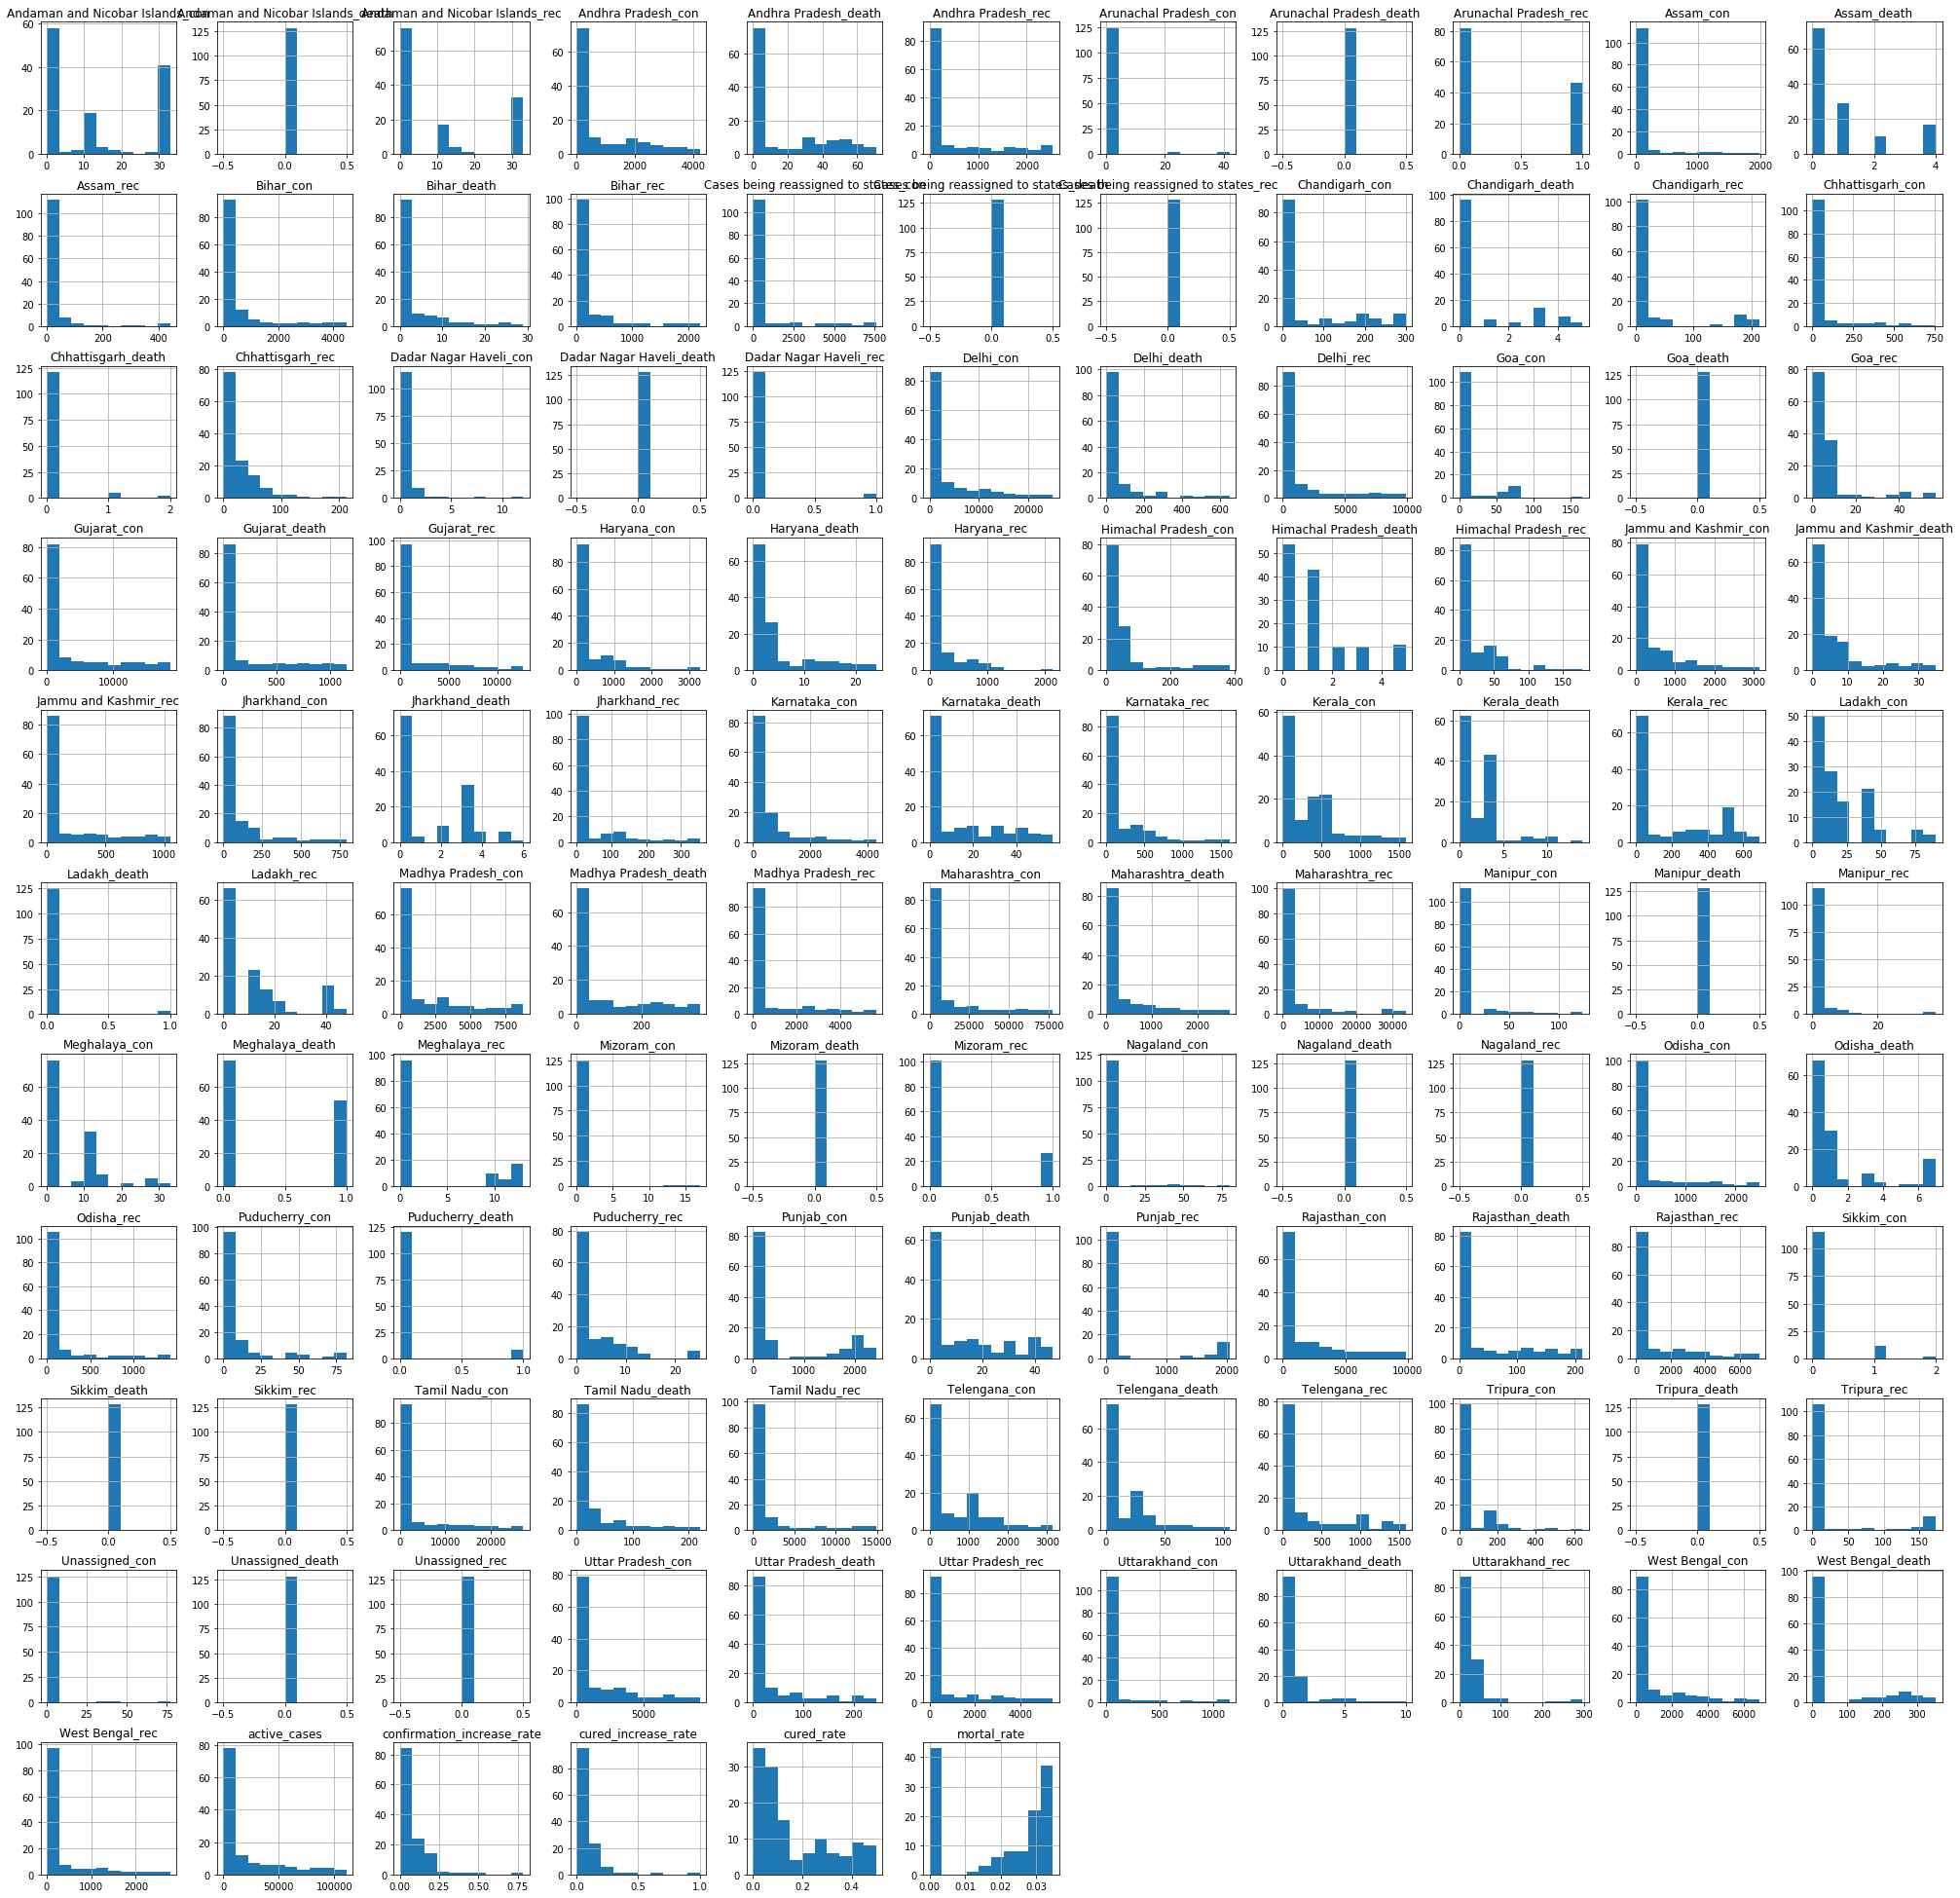

In [6]:
df_k.hist(figsize = (35,35))
plt.show()

In [6]:
print(df_k.head())

       mortal_rate  cured_rate  confirmation_increase_rate  \
index                                                        
0              0.0         0.0                    0.000000   
1              0.0         0.0                    0.000000   
2              0.0         0.0                    0.500000   
3              0.0         0.0                    0.333333   
4              0.0         0.0                    0.000000   

       cured_increase_rate  Kerala_con  Kerala_death  Kerala_rec  \
index                                                              
0                      0.0           1             0           0   
1                      0.0           1             0           0   
2                      0.0           2             0           0   
3                      0.0           3             0           0   
4                      0.0           3             0           0   

       Telengana_con  Telengana_death  Telengana_rec  ...  \
index                      

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 116, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(3, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

Using TensorFlow backend.


In [10]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=2000)

In [11]:
results=regressor.fit(X_train,y_train)

W0607 09:12:42.459217 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0607 09:12:42.465256 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0607 09:12:42.471665 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0607 09:12:42.586942 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0607 09:12:42.751063 140543324170048 module_wrapper.py:139] From /usr/local/l

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                3744      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 771       
Total para

W0607 09:12:42.950309 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0607 09:12:43.142537 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0607 09:12:43.150320 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0607 09:12:43.151504 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



Epoch 1/2000


W0607 09:12:45.482321 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0607 09:12:45.483691 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0607 09:12:45.638016 140543324170048 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



102/102 [==============================] - 3s 28ms/step - loss: 16299.5126 - acc: 0.1667 - mean_absolute_error: 16299.5126
Epoch 2/2000
102/102 [==============================] - 0s 263us/step - loss: 15943.6519 - acc: 0.0588 - mean_absolute_error: 15943.6519
Epoch 3/2000
102/102 [==============================] - 0s 306us/step - loss: 14505.6312 - acc: 0.0000e+00 - mean_absolute_error: 14505.6312
Epoch 4/2000
102/102 [==============================] - 0s 210us/step - loss: 10474.1811 - acc: 0.0686 - mean_absolute_error: 10474.1811
Epoch 5/2000
102/102 [==============================] - 0s 249us/step - loss: 5110.1179 - acc: 1.0000 - mean_absolute_error: 5110.1179
Epoch 6/2000
102/102 [==============================] - 0s 322us/step - loss: 2838.2615 - acc: 1.0000 - mean_absolute_error: 2838.2615
Epoch 7/2000
102/102 [==============================] - 0s 258us/step - loss: 2033.1834 - acc: 1.0000 - mean_absolute_error: 2033.1834
Epoch 8/2000
102/102 [==============================] - 0

102/102 [==============================] - 0s 193us/step - loss: 807.1111 - acc: 1.0000 - mean_absolute_error: 807.1111
Epoch 122/2000
102/102 [==============================] - 0s 170us/step - loss: 751.5691 - acc: 1.0000 - mean_absolute_error: 751.5691
Epoch 123/2000
102/102 [==============================] - 0s 169us/step - loss: 826.2308 - acc: 1.0000 - mean_absolute_error: 826.2308
Epoch 124/2000
102/102 [==============================] - 0s 163us/step - loss: 646.0723 - acc: 1.0000 - mean_absolute_error: 646.0723
Epoch 125/2000
102/102 [==============================] - 0s 170us/step - loss: 557.9440 - acc: 1.0000 - mean_absolute_error: 557.9440
Epoch 126/2000
102/102 [==============================] - 0s 167us/step - loss: 419.3234 - acc: 1.0000 - mean_absolute_error: 419.3234
Epoch 127/2000
102/102 [==============================] - 0s 167us/step - loss: 385.6305 - acc: 1.0000 - mean_absolute_error: 385.6305
Epoch 128/2000
102/102 [==============================] - 0s 163us/ste

102/102 [==============================] - 0s 192us/step - loss: 228.7766 - acc: 1.0000 - mean_absolute_error: 228.7766
Epoch 242/2000
102/102 [==============================] - 0s 185us/step - loss: 330.0476 - acc: 1.0000 - mean_absolute_error: 330.0476
Epoch 243/2000
102/102 [==============================] - 0s 208us/step - loss: 350.5353 - acc: 1.0000 - mean_absolute_error: 350.5353
Epoch 244/2000
102/102 [==============================] - 0s 187us/step - loss: 304.8907 - acc: 1.0000 - mean_absolute_error: 304.8907
Epoch 245/2000
102/102 [==============================] - 0s 179us/step - loss: 572.2621 - acc: 1.0000 - mean_absolute_error: 572.2621
Epoch 246/2000
102/102 [==============================] - 0s 190us/step - loss: 335.2197 - acc: 1.0000 - mean_absolute_error: 335.2197
Epoch 247/2000
102/102 [==============================] - 0s 185us/step - loss: 311.6060 - acc: 1.0000 - mean_absolute_error: 311.6060
Epoch 248/2000
102/102 [==============================] - 0s 180us/ste

102/102 [==============================] - 0s 169us/step - loss: 462.1503 - acc: 1.0000 - mean_absolute_error: 462.1503
Epoch 362/2000
102/102 [==============================] - 0s 171us/step - loss: 471.6881 - acc: 1.0000 - mean_absolute_error: 471.6881
Epoch 363/2000
102/102 [==============================] - 0s 178us/step - loss: 316.1312 - acc: 1.0000 - mean_absolute_error: 316.1312
Epoch 364/2000
102/102 [==============================] - 0s 174us/step - loss: 246.3496 - acc: 1.0000 - mean_absolute_error: 246.3496
Epoch 365/2000
102/102 [==============================] - 0s 177us/step - loss: 358.5466 - acc: 1.0000 - mean_absolute_error: 358.5466
Epoch 366/2000
102/102 [==============================] - 0s 175us/step - loss: 300.9411 - acc: 1.0000 - mean_absolute_error: 300.9411
Epoch 367/2000
102/102 [==============================] - 0s 195us/step - loss: 1777.2870 - acc: 1.0000 - mean_absolute_error: 1777.2870
Epoch 368/2000
102/102 [==============================] - 0s 205us/s

102/102 [==============================] - 0s 183us/step - loss: 445.3658 - acc: 1.0000 - mean_absolute_error: 445.3658
Epoch 482/2000
102/102 [==============================] - 0s 179us/step - loss: 195.9159 - acc: 1.0000 - mean_absolute_error: 195.9159
Epoch 483/2000
102/102 [==============================] - 0s 170us/step - loss: 222.3485 - acc: 1.0000 - mean_absolute_error: 222.3485
Epoch 484/2000
102/102 [==============================] - 0s 167us/step - loss: 357.3756 - acc: 1.0000 - mean_absolute_error: 357.3756
Epoch 485/2000
102/102 [==============================] - 0s 167us/step - loss: 623.8296 - acc: 1.0000 - mean_absolute_error: 623.8296
Epoch 486/2000
102/102 [==============================] - 0s 167us/step - loss: 525.7613 - acc: 1.0000 - mean_absolute_error: 525.7613
Epoch 487/2000
102/102 [==============================] - 0s 182us/step - loss: 240.2170 - acc: 1.0000 - mean_absolute_error: 240.2170
Epoch 488/2000
102/102 [==============================] - 0s 170us/ste

102/102 [==============================] - 0s 178us/step - loss: 221.7521 - acc: 1.0000 - mean_absolute_error: 221.7521
Epoch 602/2000
102/102 [==============================] - 0s 185us/step - loss: 293.7560 - acc: 1.0000 - mean_absolute_error: 293.7560
Epoch 603/2000
102/102 [==============================] - 0s 217us/step - loss: 351.3590 - acc: 1.0000 - mean_absolute_error: 351.3590
Epoch 604/2000
102/102 [==============================] - 0s 213us/step - loss: 188.8732 - acc: 1.0000 - mean_absolute_error: 188.8732
Epoch 605/2000
102/102 [==============================] - 0s 190us/step - loss: 306.0682 - acc: 1.0000 - mean_absolute_error: 306.0682
Epoch 606/2000
102/102 [==============================] - 0s 171us/step - loss: 278.7231 - acc: 1.0000 - mean_absolute_error: 278.7231
Epoch 607/2000
102/102 [==============================] - 0s 173us/step - loss: 481.5055 - acc: 1.0000 - mean_absolute_error: 481.5055
Epoch 608/2000
102/102 [==============================] - 0s 180us/ste

102/102 [==============================] - 0s 378us/step - loss: 230.1708 - acc: 1.0000 - mean_absolute_error: 230.1708
Epoch 722/2000
102/102 [==============================] - 0s 367us/step - loss: 316.4666 - acc: 1.0000 - mean_absolute_error: 316.4666
Epoch 723/2000
102/102 [==============================] - 0s 253us/step - loss: 277.1138 - acc: 1.0000 - mean_absolute_error: 277.1138
Epoch 724/2000
102/102 [==============================] - 0s 256us/step - loss: 278.7755 - acc: 1.0000 - mean_absolute_error: 278.7755
Epoch 725/2000
102/102 [==============================] - 0s 290us/step - loss: 580.0342 - acc: 1.0000 - mean_absolute_error: 580.0342
Epoch 726/2000
102/102 [==============================] - 0s 271us/step - loss: 711.7199 - acc: 1.0000 - mean_absolute_error: 711.7199
Epoch 727/2000
102/102 [==============================] - 0s 263us/step - loss: 715.8770 - acc: 1.0000 - mean_absolute_error: 715.8770
Epoch 728/2000
102/102 [==============================] - 0s 260us/ste

102/102 [==============================] - 0s 184us/step - loss: 181.6471 - acc: 1.0000 - mean_absolute_error: 181.6471
Epoch 842/2000
102/102 [==============================] - 0s 194us/step - loss: 217.5818 - acc: 1.0000 - mean_absolute_error: 217.5818
Epoch 843/2000
102/102 [==============================] - 0s 180us/step - loss: 147.9587 - acc: 1.0000 - mean_absolute_error: 147.9587
Epoch 844/2000
102/102 [==============================] - 0s 171us/step - loss: 153.3141 - acc: 1.0000 - mean_absolute_error: 153.3141
Epoch 845/2000
102/102 [==============================] - 0s 176us/step - loss: 146.0113 - acc: 1.0000 - mean_absolute_error: 146.0113
Epoch 846/2000
102/102 [==============================] - 0s 178us/step - loss: 289.2716 - acc: 1.0000 - mean_absolute_error: 289.2716
Epoch 847/2000
102/102 [==============================] - 0s 183us/step - loss: 222.0089 - acc: 1.0000 - mean_absolute_error: 222.0089
Epoch 848/2000
102/102 [==============================] - 0s 190us/ste

102/102 [==============================] - 0s 188us/step - loss: 456.5802 - acc: 1.0000 - mean_absolute_error: 456.5802
Epoch 962/2000
102/102 [==============================] - 0s 185us/step - loss: 410.3466 - acc: 1.0000 - mean_absolute_error: 410.3466
Epoch 963/2000
102/102 [==============================] - 0s 184us/step - loss: 371.4515 - acc: 1.0000 - mean_absolute_error: 371.4515
Epoch 964/2000
102/102 [==============================] - 0s 183us/step - loss: 448.4898 - acc: 1.0000 - mean_absolute_error: 448.4898
Epoch 965/2000
102/102 [==============================] - 0s 190us/step - loss: 519.0339 - acc: 1.0000 - mean_absolute_error: 519.0339
Epoch 966/2000
102/102 [==============================] - 0s 182us/step - loss: 271.4598 - acc: 1.0000 - mean_absolute_error: 271.4598
Epoch 967/2000
102/102 [==============================] - 0s 192us/step - loss: 564.3025 - acc: 1.0000 - mean_absolute_error: 564.3025
Epoch 968/2000
102/102 [==============================] - 0s 181us/ste

102/102 [==============================] - 0s 189us/step - loss: 881.9033 - acc: 1.0000 - mean_absolute_error: 881.9033
Epoch 1082/2000
102/102 [==============================] - 0s 190us/step - loss: 1014.0642 - acc: 1.0000 - mean_absolute_error: 1014.0642
Epoch 1083/2000
102/102 [==============================] - 0s 183us/step - loss: 682.9864 - acc: 1.0000 - mean_absolute_error: 682.9864
Epoch 1084/2000
102/102 [==============================] - 0s 180us/step - loss: 305.4828 - acc: 1.0000 - mean_absolute_error: 305.4828
Epoch 1085/2000
102/102 [==============================] - 0s 178us/step - loss: 245.2623 - acc: 1.0000 - mean_absolute_error: 245.2623
Epoch 1086/2000
102/102 [==============================] - 0s 180us/step - loss: 420.2639 - acc: 1.0000 - mean_absolute_error: 420.2639
Epoch 1087/2000
102/102 [==============================] - 0s 181us/step - loss: 499.6842 - acc: 1.0000 - mean_absolute_error: 499.6842
Epoch 1088/2000
102/102 [==============================] - 0s 

102/102 [==============================] - 0s 175us/step - loss: 513.0904 - acc: 1.0000 - mean_absolute_error: 513.0904
Epoch 1202/2000
102/102 [==============================] - 0s 174us/step - loss: 674.4044 - acc: 1.0000 - mean_absolute_error: 674.4044
Epoch 1203/2000
102/102 [==============================] - 0s 257us/step - loss: 679.5292 - acc: 1.0000 - mean_absolute_error: 679.5292
Epoch 1204/2000
102/102 [==============================] - 0s 220us/step - loss: 656.9855 - acc: 1.0000 - mean_absolute_error: 656.9855
Epoch 1205/2000
102/102 [==============================] - 0s 245us/step - loss: 574.3755 - acc: 1.0000 - mean_absolute_error: 574.3755
Epoch 1206/2000
102/102 [==============================] - 0s 272us/step - loss: 313.9444 - acc: 1.0000 - mean_absolute_error: 313.9444
Epoch 1207/2000
102/102 [==============================] - 0s 247us/step - loss: 212.4118 - acc: 1.0000 - mean_absolute_error: 212.4118
Epoch 1208/2000
102/102 [==============================] - 0s 23

102/102 [==============================] - 0s 173us/step - loss: 262.9985 - acc: 1.0000 - mean_absolute_error: 262.9985
Epoch 1322/2000
102/102 [==============================] - 0s 170us/step - loss: 273.9462 - acc: 1.0000 - mean_absolute_error: 273.9462
Epoch 1323/2000
102/102 [==============================] - 0s 176us/step - loss: 214.5576 - acc: 1.0000 - mean_absolute_error: 214.5576
Epoch 1324/2000
102/102 [==============================] - 0s 165us/step - loss: 367.2625 - acc: 1.0000 - mean_absolute_error: 367.2625
Epoch 1325/2000
102/102 [==============================] - 0s 169us/step - loss: 512.8225 - acc: 1.0000 - mean_absolute_error: 512.8225
Epoch 1326/2000
102/102 [==============================] - 0s 173us/step - loss: 455.6750 - acc: 1.0000 - mean_absolute_error: 455.6750
Epoch 1327/2000
102/102 [==============================] - 0s 205us/step - loss: 631.0442 - acc: 1.0000 - mean_absolute_error: 631.0442
Epoch 1328/2000
102/102 [==============================] - 0s 18

102/102 [==============================] - 0s 196us/step - loss: 170.2352 - acc: 1.0000 - mean_absolute_error: 170.2352
Epoch 1442/2000
102/102 [==============================] - 0s 183us/step - loss: 167.3048 - acc: 1.0000 - mean_absolute_error: 167.3048
Epoch 1443/2000
102/102 [==============================] - 0s 200us/step - loss: 221.2426 - acc: 1.0000 - mean_absolute_error: 221.2426
Epoch 1444/2000
102/102 [==============================] - 0s 185us/step - loss: 130.7835 - acc: 1.0000 - mean_absolute_error: 130.7835
Epoch 1445/2000
102/102 [==============================] - 0s 189us/step - loss: 274.1952 - acc: 1.0000 - mean_absolute_error: 274.1952
Epoch 1446/2000
102/102 [==============================] - 0s 197us/step - loss: 285.5363 - acc: 1.0000 - mean_absolute_error: 285.5363
Epoch 1447/2000
102/102 [==============================] - 0s 190us/step - loss: 774.3537 - acc: 1.0000 - mean_absolute_error: 774.3537
Epoch 1448/2000
102/102 [==============================] - 0s 19

102/102 [==============================] - 0s 183us/step - loss: 224.8757 - acc: 1.0000 - mean_absolute_error: 224.8757
Epoch 1562/2000
102/102 [==============================] - 0s 191us/step - loss: 499.6821 - acc: 1.0000 - mean_absolute_error: 499.6821
Epoch 1563/2000
102/102 [==============================] - 0s 183us/step - loss: 239.0072 - acc: 1.0000 - mean_absolute_error: 239.0072
Epoch 1564/2000
102/102 [==============================] - 0s 180us/step - loss: 203.8124 - acc: 1.0000 - mean_absolute_error: 203.8124
Epoch 1565/2000
102/102 [==============================] - 0s 202us/step - loss: 221.7427 - acc: 1.0000 - mean_absolute_error: 221.7427
Epoch 1566/2000
102/102 [==============================] - 0s 174us/step - loss: 341.5034 - acc: 1.0000 - mean_absolute_error: 341.5034
Epoch 1567/2000
102/102 [==============================] - 0s 182us/step - loss: 358.5091 - acc: 1.0000 - mean_absolute_error: 358.5091
Epoch 1568/2000
102/102 [==============================] - 0s 18

102/102 [==============================] - 0s 197us/step - loss: 301.9024 - acc: 1.0000 - mean_absolute_error: 301.9024
Epoch 1682/2000
102/102 [==============================] - 0s 187us/step - loss: 277.6611 - acc: 1.0000 - mean_absolute_error: 277.6611
Epoch 1683/2000
102/102 [==============================] - 0s 186us/step - loss: 342.5076 - acc: 1.0000 - mean_absolute_error: 342.5076
Epoch 1684/2000
102/102 [==============================] - 0s 202us/step - loss: 211.9783 - acc: 1.0000 - mean_absolute_error: 211.9783
Epoch 1685/2000
102/102 [==============================] - 0s 194us/step - loss: 294.4169 - acc: 1.0000 - mean_absolute_error: 294.4169
Epoch 1686/2000
102/102 [==============================] - 0s 185us/step - loss: 521.4070 - acc: 1.0000 - mean_absolute_error: 521.4070
Epoch 1687/2000
102/102 [==============================] - 0s 195us/step - loss: 392.1384 - acc: 1.0000 - mean_absolute_error: 392.1384
Epoch 1688/2000
102/102 [==============================] - 0s 19

102/102 [==============================] - 0s 165us/step - loss: 212.2734 - acc: 1.0000 - mean_absolute_error: 212.2734
Epoch 1801/2000
102/102 [==============================] - 0s 176us/step - loss: 184.2256 - acc: 1.0000 - mean_absolute_error: 184.2256
Epoch 1802/2000
102/102 [==============================] - 0s 164us/step - loss: 238.5108 - acc: 1.0000 - mean_absolute_error: 238.5108
Epoch 1803/2000
102/102 [==============================] - 0s 167us/step - loss: 248.4471 - acc: 1.0000 - mean_absolute_error: 248.4471
Epoch 1804/2000
102/102 [==============================] - 0s 171us/step - loss: 625.9272 - acc: 1.0000 - mean_absolute_error: 625.9272
Epoch 1805/2000
102/102 [==============================] - 0s 164us/step - loss: 334.5157 - acc: 1.0000 - mean_absolute_error: 334.5157
Epoch 1806/2000
102/102 [==============================] - 0s 164us/step - loss: 538.6364 - acc: 1.0000 - mean_absolute_error: 538.6364
Epoch 1807/2000
102/102 [==============================] - 0s 16

102/102 [==============================] - 0s 183us/step - loss: 342.6046 - acc: 1.0000 - mean_absolute_error: 342.6046
Epoch 1921/2000
102/102 [==============================] - 0s 196us/step - loss: 246.6191 - acc: 1.0000 - mean_absolute_error: 246.6191
Epoch 1922/2000
102/102 [==============================] - 0s 183us/step - loss: 303.1097 - acc: 1.0000 - mean_absolute_error: 303.1097
Epoch 1923/2000
102/102 [==============================] - 0s 175us/step - loss: 337.3215 - acc: 1.0000 - mean_absolute_error: 337.3215
Epoch 1924/2000
102/102 [==============================] - 0s 167us/step - loss: 354.5411 - acc: 1.0000 - mean_absolute_error: 354.5411
Epoch 1925/2000
102/102 [==============================] - 0s 165us/step - loss: 273.1233 - acc: 1.0000 - mean_absolute_error: 273.1233
Epoch 1926/2000
102/102 [==============================] - 0s 167us/step - loss: 168.2298 - acc: 1.0000 - mean_absolute_error: 168.2298
Epoch 1927/2000
102/102 [==============================] - 0s 17

In [12]:
y_pred= regressor.predict(X_test)

In [13]:
print(y_pred)

[[ 7.0905406e+04  2.2900364e+03  2.2960867e+04]
 [ 4.7135593e+01  2.3849905e-02  2.8663404e+00]
 [ 9.6199672e+04  2.9857642e+03  3.7566098e+04]
 [ 1.7352840e+04  5.4051544e+02  2.7202280e+03]
 [ 3.0263479e+00 -1.5560627e-02 -2.3049265e-02]
 [ 6.1418957e+01  3.6533839e-01  2.7230489e+00]
 [ 3.3063484e+04  1.0341934e+03  8.4470527e+03]
 [ 2.7875918e+04  8.5604041e+02  6.3849248e+03]
 [ 3.1388492e+04  9.7591779e+02  7.7445215e+03]
 [ 1.4548931e+04  4.6889008e+02  1.8608965e+03]
 [ 3.0263479e+00 -1.5560627e-02 -2.3049265e-02]
 [ 1.1333970e+05  3.4405857e+03  4.6454184e+04]
 [ 3.3459504e+00 -2.2143543e-02 -1.7026931e-02]
 [ 5.7748062e+03  1.5020433e+02  4.8116211e+02]
 [ 2.0042715e+04  6.0443158e+02  3.7581868e+03]
 [ 3.0263479e+00 -1.5560627e-02 -2.3049265e-02]
 [ 1.3906598e+03  2.8954041e+01  1.2895584e+02]
 [ 1.8284714e+03  4.0465027e+01  1.5903477e+02]
 [ 1.5394459e+05  4.4793247e+03  6.6057031e+04]
 [ 1.5458334e+02  2.6694832e+00  1.9440763e+01]
 [ 3.0263479e+00 -1.5560627e-02 -2.30492

In [14]:
print(y_test)

[[ 70756   2293  22455]
 [    46      0      3]
 [ 95759   3029  36824]
 [ 17656    559   2842]
 [     3      0      0]
 [    60      0      3]
 [ 33330   1075   8373]
 [ 28160    886   6362]
 [ 31709   1008   7797]
 [ 14792    488   2015]
 [     3      0      0]
 [112359   3435  45300]
 [     3      0      0]
 [  5865    169    478]
 [ 20471    652   3960]
 [     3      0      0]
 [  1397     35    124]
 [  1834     41    144]
 [151767   4337  64426]
 [   151      3     14]
 [     3      0      0]
 [     3      0      0]
 [ 34972   1152   9065]
 [   519      9     40]
 [ 49391   1694  14183]
 [226770   6348 109462]]


In [15]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,3):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(y_test[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))
    
    

### Confirmed

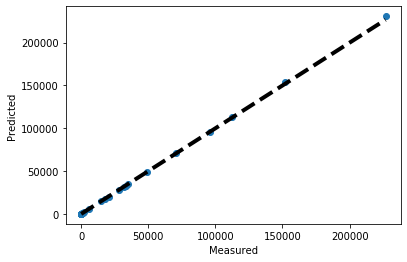

In [16]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Deaths

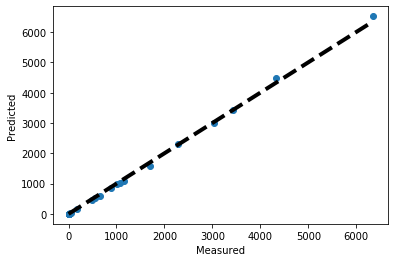

In [17]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Cured

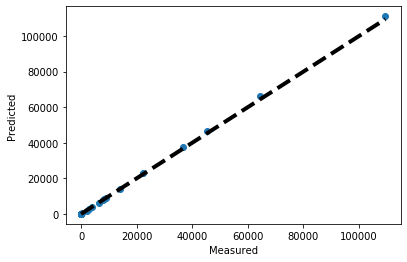

In [18]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[2], y_pred_mod[2])
ax.plot([y_test_mod[2].min(),y_test_mod[2].max()], [y_test_mod[2].min(), y_test_mod[2].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Future Prediction

In [20]:
print(df_k.head())

       mortal_rate  cured_rate  confirmation_increase_rate  \
index                                                        
0              0.0         0.0                    0.000000   
1              0.0         0.0                    0.000000   
2              0.0         0.0                    0.500000   
3              0.0         0.0                    0.333333   
4              0.0         0.0                    0.000000   

       cured_increase_rate  Kerala_con  Kerala_death  Kerala_rec  \
index                                                              
0                      0.0           1             0           0   
1                      0.0           1             0           0   
2                      0.0           2             0           0   
3                      0.0           3             0           0   
4                      0.0           3             0           0   

       Telengana_con  Telengana_death  Telengana_rec  ...  \
index                      

In [50]:
import numpy as np
i=1

difference=[]
per_increase=[]
#df_k.reset_index(inplace=True)
#df_k2=df_k.drop(['level_0','index'],axis=1)
print(df_k2.head())

while(i<len(df_k2)):
    temp_diff=[]
    j=0
    while j<len(df_k2.columns):
    
        diff=float(df_k2.iloc[i][j]-df_k2.iloc[i-1][j])
        #print(diff)

        calc=float(diff/(df_k2.iloc[i][j]+0.0000001))
        temp_diff.append(calc)
        
        j+=1
    print(temp_diff)
    
    difference.append(temp_diff)
    
    i+=1
    

        
    
    


   mortal_rate  cured_rate  confirmation_increase_rate  cured_increase_rate  \
0          0.0         0.0                    0.000000                  0.0   
1          0.0         0.0                    0.000000                  0.0   
2          0.0         0.0                    0.500000                  0.0   
3          0.0         0.0                    0.333333                  0.0   
4          0.0         0.0                    0.000000                  0.0   

   Kerala_con  Kerala_death  Kerala_rec  Telengana_con  Telengana_death  \
0           1             0           0              0                0   
1           1             0           0              0                0   
2           2             0           0              0                0   
3           3             0           0              0                0   
4           3             0           0              0                0   

   Telengana_rec  ...  Dadar Nagar Haveli_con  Dadar Nagar Haveli_death  \

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[0.0, -0.2608690608705311, 0.26449262578508753, 0.0, 0.39999999733333336, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7499999812500004, 0.0, 0.0, 0.5999999880000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21818181778512397]
[0.0, -0.03448268965532068, -5.206880931081412, 0.0, 0.11764705813148789, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19999999600000007, 0.0, 0.0, -3.999999866666671, 0.0, 0.0, 0.22222221975308645, 0.0, 0.0, 0.8571428510204082, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.4999999250000038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[-0.2027765234601968, -0.2027774119335276, -0.26868325006717914, -416666.66666667, 0.22388059668077526, 0.0, 0.0, 0.3124999990234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714234693878, 0.0, 0.0, 0.12903225764828302, 0.0, 0.0, 0.19230769156804733, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22222221975308645, 0.0, 0.0, 0.21212121147842056, 0.0, 0.0, 0.09459459446676408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2857142816326531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.42857142244897967, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666388888893, 0.0, 0.0, 0.3793103435196195, 0.0, 0.0, 0.0, 0.0, 0.0, 0.33333332777777785, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18159203975582286]
[0.06774402812648216, 0.28083104439769324, -0.01742842280295302, 0.9999997500000625, 0.29473684179501386, 0.0, 0.24999999375000015, 0.08

[-0.12069363055165042, -0.13047784225273681, 0.5613939909897749, -0.27741915509691917, 0.029045643141474838, 0.4999999750000013, 0.1739130427221172, 0.17708333314887154, 0.6666666444444452, 0.0, 0.3618421050251039, 0.0, 0.0, 0.20430107504913864, 0.0, 0.0, 0.01941747570930342, 0.9999999500000026, 0.0, 0.06976744169821525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6837606834684784, 0.0, 0.33333332777777785, 0.17821782160572494, 0.0, 0.3749999953125001, 0.2847682118262357, 0.0, 0.0, 0.023809523752834467, 0.0, 0.0, 0.12903225785639957, 0.0, 0.0, 0.518072288532443, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24999999375000015, 0.0, 0.0, 0.6666666444444452, 0.0, 0.9999999000000099, 0.2972972964937911, 0.3333333222222226, 0.9999999833333336, 0.11111110987654323, 0.0, 0.9999999500000026, 0.187499998828125, 0.0, 0.0, 0.10975609742712672, 0.0, 0.39999999200000014, 0.0, 0.0, 0.0, 0.2878787874426079, 0.0, 0.0, 0.3478260854442344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -380000000.0, 0.0, 0.0, 0.9999

[0.019545408133833767, 0.04381518893142287, 0.08739637402185554, -0.006790858357416984, 0.02608695651417769, 0.0, 0.15662650583538976, 0.03393665157603243, 0.0, 0.0, 0.13901345289401892, 0.0, 0.0, 0.14360313312177464, 0.0, 0.0, 0.1634146341064842, 0.24999999375000015, 0.1612903220603538, 0.1301775147158713, 0.0, 0.03448275850178359, 0.0, 0.0, 0.0, 0.06504065039769097, 0.12499999843750002, 0.0952380947845805, 0.03314917125240378, 0.19999999600000007, 0.10714285676020407, 0.10308370043144637, 0.11111111095679013, 0.32478632450872963, 0.09900990089206942, 0.12499999843750002, 0.0, 0.2658227846418843, 0.4999999875000003, 0.0, 0.12356321835529792, 0.0, 0.16666666388888893, 0.11428571395918367, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03883495141860684, 0.0, 0.187499998828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07821229045909928, 0.187499998828125, 0.0, 0.0, 0.0, 0.0, 0.11583011578539376, 0.187499998828125, 0.0, 0.02564102557527942, 0.0, 0.0, 0.0, 0.0, 0.9999999000000099, 0.0, 0.0, 0.0, 0.0909

[-0.007565693078310832, 0.07030898210806502, 0.167603176055042, 0.20855713806158016, 0.01772151898285531, 0.0, 0.11020408158767181, 0.06056527590032769, 0.0, 0.35483870948664586, 0.03780487804647531, 0.1578947364265928, 0.17647058788927336, 0.09549071617192831, 0.7272727206611571, 0.10365853652215944, 0.08628841606545054, 0.07142857091836735, 0.08108108097151207, 0.0, 0.0, 0.0, 0.05555555524691358, 0.0, 0.2857142836734694, 0.019731649564346355, 0.06666666622222223, 0.34444444425308646, 0.10764872518196919, 0.0, 0.0, 0.08923556941999265, 0.03608247420820491, 0.01666666666111111, 0.0, 0.0, 0.0, 0.04458598724694714, 0.0, 0.052631578808864266, 0.06643356642195218, 0.0, 0.4444444432098765, 0.0, 0.0, 0.0, 0.0, 0.0, 0.052631578670360106, 0.0, 0.0, 0.0, 0.09411764702191465, 0.2999999970000001, 0.17647058788927336, 0.08333333310185186, 0.0, 0.2608695640831758, 0.0, 0.0, 0.22222221975308645, 0.14691478940774585, 0.052631578808864266, 0.1351351349525201, 0.0, 0.0, 0.0, 0.1437308868391643, 0.07017

[0.014859408161662988, 0.019233280810587842, -0.2905276257352534, -0.33642677093433077, 0.006651884699190269, 0.24999999375000015, 0.0211480362473873, 0.0, 0.0, 0.0, 0.05489260142979743, 0.056603773478106086, 0.05717619602600044, 0.03441494591767871, 0.0, 0.0, 0.09786276714860163, 0.07692307662721894, 0.16935483864138917, 0.0, 0.0, 0.0, 0.09999999949999999, 0.0, 0.0, 0.04102564102330338, 0.09090909049586776, 0.13163972284854045, 0.05316973414045609, 0.0, 0.01960784312443932, 0.056769840104785536, 0.05980066443195991, 0.12225705327876102, 0.07046979863407053, 0.058823529065743944, 0.029850746224103365, 0.0594713656256671, 0.0, 0.155963302609208, 0.09990574928370351, 0.06451612882414151, 0.15204678353681475, 0.020833333289930554, 0.0, 0.03999999984, 0.04255319144409235, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09982486863400616, 0.16666666574074074, 0.0, 0.0, 0.0, 0.06666666644444444, 0.035714285586734694, 0.0, 0.06666666622222223, 0.0678507992871101, 0.11811023612747226, 0.02641509432965468, 0.0, 0.0

[-0.007088603158000552, 0.0129887911329289, 0.2047610824453075, -0.03561743291412487, 0.0059999999988, 0.0, 0.019999999995, 0.022577610534094298, 0.07142857117346939, 0.03711790392202666, 0.09315866084199033, 0.04687499992675782, 0.07085987260582326, 0.038239538238158746, 0.04615384608284024, 0.004460303300226556, 0.11348057882279207, 0.023255813899405082, 0.0630372492746365, 0.08629441622175268, 0.0, 0.0, 0.449999998875, 0.0, 0.0, 0.08378672469772265, 0.03448275850178359, 0.021625652496523068, 0.02805280527589888, 0.11999999952, 0.10992907797520245, 0.06424853610878131, 0.06909788866236126, 0.060499999996974994, 0.37823834191991734, 0.049999999749999996, 0.1964285712531888, 0.04054054053445338, 0.0, 0.027559055107260214, 0.07580543271788974, 0.0, 0.17418032783315976, 0.016949152513645503, 0.0, 0.07692307672583826, 0.06874999995703125, 0.0, 0.017857142825255103, 0.0, 0.0, 0.0, 0.13774403469221866, 0.0, 0.07947019862286742, 0.0, 0.0, 0.0, 0.06382978716613853, 0.0, 0.10526315734072021, 0

[-0.020023457048218472, 0.012583899588419132, 0.17010291789784748, -0.04726655355063481, 0.013671874997329712, 0.0, 0.008179959098531706, 0.027591973241840134, 0.0, 0.0, 0.05503394482081419, 0.0, 0.02368293861654505, 0.027792343995076237, 0.009345794383788977, 0.06893382352624386, 0.027112777616754753, 0.0, 0.09316394433798161, 0.03982930298153211, 0.09999999900000002, 0.03333333332222222, 0.0, 0.0, 0.190476189569161, 0.09286507495706739, 0.06382978709823449, 0.06891271056309786, 0.06367924527550953, 0.032258064412070755, 0.08962264148829654, 0.08763700329219413, 0.0637019230692666, 0.09502262443212617, 0.033461327480336735, 0.0, 0.054216867437218756, 0.029036004642388386, 0.0, 0.039164490851393084, 0.025252525251249873, 0.022222222172839506, 0.04108108107663989, 0.01470588233131488, 0.0, 0.0, 0.2201591511352363, 0.3333333222222226, 0.0735294116565744, 0.0, 0.0, 0.0, 0.07890665290980367, 0.0756756756347699, 0.10791366903886962, 0.0, 0.0, 0.12244897934194085, 0.0, 0.0, 0.0, 0.0485721259

[-0.0017497428551891637, 0.021384461079514333, -0.016288602135444617, -0.5730705814981173, 0.02329450914753835, 0.0, 0.004024144868405605, 0.02707930367330243, 0.0, 0.02116935483657567, 0.07171275114311007, 0.19374999987890626, 0.12463768115664131, 0.046520569011024214, 0.03816793890216188, 0.051136363634654534, 0.00023479690067539807, 0.0, 0.0, 0.025274725271947834, 0.07142857091836735, 0.08540925265384178, 0.0, 0.0, 0.0833333329861111, 0.05693157519550132, 0.051282051216305066, 0.15196548417660677, 0.047951176979254474, 0.027027026953981008, 0.025540275044098178, 0.07100717030202702, 0.052587646072405035, 0.07804370447349059, 0.009164969449635185, 0.08571428546938775, 0.07979502195609113, 0.05240912932777606, 0.07692307633136096, 0.05739130433784499, 0.021603656002426107, 0.01999999996, 0.0707417582368996, 0.04347826082230624, 0.0, 0.01923076919378698, 0.10990338162923873, 0.24999999375000015, 0.10909090904132232, 0.0, 0.0, 0.0, 0.03772880089511659, 0.025210084023020975, 0.0907194994

[-0.01258363855543172, 0.006922657112925354, -0.021217529385634842, 0.14113364753741472, 0.06139315229499491, 0.0, 0.01151631477706021, 0.02211434735587301, 0.07547169797080812, 0.02293577981440956, 0.037859591593099866, 0.1149425286915929, 0.041743119265416774, 0.040694365394981585, 0.018404907964168767, 0.016112266111847396, 0.040044671345883145, 0.03726708072219436, 0.037309214244281824, 0.04476351350973281, 0.0, 0.019607843134691785, 0.057692307581360944, 0.0, 0.0, 0.046998832708441365, 0.07207207200714229, 0.10007208072921585, 0.06223073240487168, 0.0, 0.07033639142655407, 0.06054030379633983, 0.03547400611403829, 0.081917808218617, 0.007281553397704779, 0.0249999999375, 0.014752370915977218, 0.03207896360073541, 0.0, 0.043263288004541, 0.02337938363360328, 0.0, 0.025323275860704562, 0.2302839115992795, 0.3333333222222226, 0.03448275856123662, 0.050149700595048675, 0.0, 0.09636363634611571, 0.36585365764425937, 0.0, 0.1666666652777778, 0.05672211616971033, 0.011029411760650951, 0.

[0.007835757862391428, 0.09528333245070765, 0.017500924665883214, 0.6488972109241667, 0.05391304347357277, 0.12499999843750002, 0.017699115041115203, 0.06969072164661069, 0.05633802808966475, 0.026068066616504845, 0.06355688484951365, 0.20603015070200245, 0.04473617129690624, 0.03562462641917962, 0.021739130422967864, 0.08142639206557158, 0.015650741350691232, 0.00505050504795429, 0.006833176248660858, 0.1260894828514765, 0.0, 0.06276595744013129, 0.013513513495252009, 0.0, 0.0, 0.043169021040980096, 0.05844155840360938, 0.06762132060401642, 0.08917655519276604, 0.020833333289930554, 0.06711409395222438, 0.04309956932563621, 0.055290753095553355, 0.3104419009508077, 0.017751479289132843, 0.047619047505668935, 0.0015392508978173806, 0.05914972273294133, 0.035714285586734694, 0.01828571428362449, 0.05384167636630263, 0.01666666663888889, 0.045372866125544795, 0.3016759776114978, 0.19999999600000007, 0.22549019585736257, 0.03656413232521392, 0.0, 0.0, 0.0, 0.0, 0.0, 0.057552462080665855, 

In [51]:
print(difference)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.9999998000000401, 0.0, 0.4999999750000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [52]:
arr=np.array(difference)



In [53]:
print(arr)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.99999800e-01 ...  0.00000000e+00
   0.00000000e+00  4.99999975e-01]
 [ 0.00000000e+00  0.00000000e+00 -4.99999850e-01 ...  0.00000000e+00
   0.00000000e+00  3.33333322e-01]
 ...
 [-5.84465576e-03  4.91549530e-03  4.17164295e-02 ...  0.00000000e+00
   0.00000000e+00  3.85824212e-02]
 [-9.74100913e-05 -6.63692338e-03 -4.56298482e-04 ...  0.00000000e+00
   0.00000000e+00  4.90926295e-02]
 [-4.54564227e-04  5.72948699e-03  1.26357423e-02 ...  0.00000000e+00
   0.00000000e+00  3.80587599e-02]]


In [54]:
val=np.mean(arr, axis=0)

In [55]:
print(len(val))

116


In [56]:
print(val)

[ 1.03972063e-02 -1.62770330e-02 -2.62469280e+04 -1.16086639e+05
  4.97099107e-02  2.54658496e-02  4.59829032e-02  6.02569658e-02
  3.70685265e-02  4.22251950e-02  7.76478925e-02  5.25020116e-02
  6.71839288e-02  3.99592653e-02  3.48420666e-02  5.45636632e-02
  6.13575108e-02  4.15974532e-02  5.76038318e-02  5.45230682e-02
  2.83535813e-02  4.41062305e-02  3.38445396e-02  7.87401496e-03
  2.40621049e-02  7.57399803e-02  4.58089399e-02  7.12437062e-02
  6.35501914e-02  3.57937940e-02  5.83353747e-02  7.00390638e-02
  6.30335590e-02  6.99765996e-02  5.53627012e-02  3.32152298e-02
  5.12260223e-02  6.28778929e-02  3.18473724e-02  5.40421899e-02
  6.48370704e-02  3.55642780e-02  5.70890890e-02  5.49306486e-02
  2.29752519e-02  4.09725492e-02  5.86659138e-02  2.04161968e-02
  4.87496804e-02  3.55873554e-02 -7.87401496e+04  2.68991365e-02
  7.00254145e-02  4.43576879e-02  4.56527808e-02  4.86644605e-02
  1.18110226e-02  3.92269485e-02  4.32247158e-02  1.79790015e-02
  3.06421795e-02  6.53162

In [167]:
val[val<-1]=0

In [169]:
print(val)

[ 0.01039721 -0.01627703  0.          0.          0.04970991  0.02546585
  0.0459829   0.06025697  0.03706853  0.04222519  0.07764789  0.05250201
  0.06718393  0.03995927  0.03484207  0.05456366  0.06135751  0.04159745
  0.05760383  0.05452307  0.02835358  0.04410623  0.03384454  0.00787401
  0.0240621   0.07573998  0.04580894  0.07124371  0.06355019  0.03579379
  0.05833537  0.07003906  0.06303356  0.0699766   0.0553627   0.03321523
  0.05122602  0.06287789  0.03184737  0.05404219  0.06483707  0.03556428
  0.05708909  0.05493065  0.02297525  0.04097255  0.05866591  0.0204162
  0.04874968  0.03558736  0.          0.02689914  0.07002541  0.04435769
  0.04565278  0.04866446  0.01181102  0.03922695  0.04322472  0.017979
  0.03064218  0.06531624  0.05659884  0.07262091  0.04312651  0.0175853
  0.04056614  0.06026441  0.04739924  0.04202944  0.06272104  0.03076856
  0.04234051  0.03736107  0.          0.0290834   0.0170943   0.
  0.00787401  0.02658373  0.          0.01557443  0.03351645  0

In [168]:
days_in_future=10
print(df_k.head())

   index  mortal_rate  cured_rate  confirmation_increase_rate  \
0      0          0.0         0.0                    0.000000   
1      1          0.0         0.0                    0.000000   
2      2          0.0         0.0                    0.500000   
3      3          0.0         0.0                    0.333333   
4      4          0.0         0.0                    0.000000   

   cured_increase_rate  Kerala_con  Kerala_death  Kerala_rec  Telengana_con  \
0                  0.0           1             0           0              0   
1                  0.0           1             0           0              0   
2                  0.0           2             0           0              0   
3                  0.0           3             0           0              0   
4                  0.0           3             0           0              0   

   Telengana_death  ...  Dadar Nagar Haveli_con  Dadar Nagar Haveli_death  \
0                0  ...                       0          

In [170]:
#df_k=df_k.drop(['level_0'],axis=1)
df_k.set_index(['index'])

,mortal_rate,cured_rate,confirmation_increase_rate,cured_increase_rate,Kerala_con,Kerala_death,Kerala_rec,Telengana_con,Telengana_death,Telengana_rec,...,Dadar Nagar Haveli_con,Dadar Nagar Haveli_death,Dadar Nagar Haveli_rec,Cases being reassigned to states_con,Cases being reassigned to states_death,Cases being reassigned to states_rec,Sikkim_con,Sikkim_death,Sikkim_rec,active_cases
index,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.000000,0.000000,0.500000,0.000000,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0.000000,0.000000,0.333333,0.000000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0.000000,0.000000,0.000000,0.000000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,0.000000,0.000000,0.000000,0.000000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0.000000,0.000000,0.000000,0.000000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7,0.000000,0.000000,0.000000,0.000000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0.000000,0.000000,0.000000,0.000000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [171]:
values_increased=val.tolist()

In [172]:
print(len(values_increased))

116


In [173]:
print(df_k.shape)

(128, 117)


In [174]:
day=1
total_details=[]

last_day_values=[]
i=1
while i<len(df_k.columns):
    last_day_values.append(df_k.iloc[-1][i])
    i+=1
print(len(last_day_values))
while day<=days_in_future:
    print(day)
    daywise_details=[]
    
    daywise_details.append(last_day_values[0]+day)    
    ind=1
    
    while ind<len(df_k.columns)-1:
        #print(ind)
        cal=float(last_day_values[ind]+values_increased[ind-1]*day*last_day_values[ind])
        daywise_details.append(cal)
        ind+=1
    total_details.append(daywise_details)
    day+=1

print(total_details)        
        

116
1
2
3
4
5
6
7
8
9
10
[[1.027993120783172, 0.4877192706182912, 0.04273340807035877, 0.048921086769838, 1588.0, 14.695938750358554, 707.5714362382848, 3291.7081962244124, 111.32698141368715, 1645.8277515345094, 26059.79877475385, 700.4711300980142, 10417.66491128954, 10524.567905492473, 221.5113235049687, 7351.51804098489, 9741.004557025246, 260.0325901539611, 5665.248547987481, 3469.998172168785, 25.308553636116088, 2194.5065424704817, 93.9695607475411, 1.0338445396064528, 48.37795271811024, 27911.836732515996, 236.66279567413528, 15584.644821882957, 4627.772810814528, 60.622360911105616, 1667.628008387064, 82331.08380301126, 2899.805862795215, 35804.03330165268, 2583.993488049666, 49.60204695493319, 2110.8587145453575, 3302.952161951243, 37.20072625030805, 1081.3760462852924, 4451.220167915265, 75.60343199847573, 2629.2977018739775, 1218.8237195642012, 10.549306485750499, 303.8236498068515, 2579.529976943757, 7.410661396700447, 1444.9093346473644, 85.99747379260566, 0.0, 25.0, 7060

In [175]:
df_n=df.drop(["Confirmed","Deaths","Cured"],axis=1)

In [176]:
print(len(df_n.columns))

116


In [177]:
df_new=pd.DataFrame(total_details, columns=df_n.columns)

In [178]:
print(df_new.head())

   mortal_rate  cured_rate  confirmation_increase_rate  cured_increase_rate  \
0     1.027993    0.487719                    0.042733             0.048921   
1     2.027993    0.492738                    0.042026             0.048921   
2     3.027993    0.497757                    0.041319             0.048921   
3     4.027993    0.502775                    0.040612             0.048921   
4     5.027993    0.507794                    0.039905             0.048921   

   Kerala_con  Kerala_death  Kerala_rec  Telengana_con  Telengana_death  \
0      1588.0     14.695939  707.571436    3291.708196       111.326981   
1      1588.0     15.391878  725.142872    3436.416392       117.653963   
2      1588.0     16.087816  742.714309    3581.124589       123.980944   
3      1588.0     16.783755  760.285745    3725.832785       130.307926   
4      1588.0     17.479694  777.857181    3870.540981       136.634907   

   Telengana_rec  ...  Dadar Nagar Haveli_con  Dadar Nagar Haveli_death  \

In [179]:
def get_index(df_new):
	active=[]
	
	i=0
	while(i<len(df_new)):
		
	
		active.append(i)
		i+=1


	df_new['index']=active


	

In [180]:
get_index(df_new)

In [181]:
df_new.to_csv('feature_new.csv')

In [182]:
df_2=pd.read_csv('feature_new.csv',index_col=-1)

In [183]:
print(df_2.head)

<bound method NDFrame.head of        Unnamed: 0  mortal_rate  cured_rate  confirmation_increase_rate  \
index                                                                    
0               0     1.027993    0.487719                    0.042733   
1               1     2.027993    0.492738                    0.042026   
2               2     3.027993    0.497757                    0.041319   
3               3     4.027993    0.502775                    0.040612   
4               4     5.027993    0.507794                    0.039905   
5               5     6.027993    0.512813                    0.039198   
6               6     7.027993    0.517832                    0.038491   
7               7     8.027993    0.522850                    0.037784   
8               8     9.027993    0.527869                    0.037077   
9               9    10.027993    0.532888                    0.036370   

       cured_increase_rate  Kerala_con  Kerala_death  Kerala_rec  \
index        

In [184]:
df_2=df_2.drop(['Unnamed: 0'],axis=1)

In [185]:
print(df_2.shape)

(10, 116)


In [186]:
X_test_2=df_2.values

In [187]:
y_pred= regressor.predict(X_test_2)

In [188]:
print(y_pred)

[[239616.36     6769.9214 115380.62  ]
 [248383.12     7018.794  119685.41  ]
 [257147.03     7267.746  124000.65  ]
 [265910.9      7516.6997 128315.88  ]
 [274674.8      7765.646  132631.12  ]
 [283438.7      8014.5913 136946.34  ]
 [292202.62     8263.542  141261.56  ]
 [300966.53     8512.49   145576.81  ]
 [309730.4      8761.439  149892.05  ]
 [318494.25     9010.389  154207.22  ]]


In [189]:
y_pred_new=pd.DataFrame(y_pred, columns=["Confirmed","Deaths","Cured"])

In [190]:
y_pred_new

,Confirmed,Deaths,Cured
0,239616.359375,6769.921387,115380.617188
1,248383.125000,7018.793945,119685.406250
2,257147.031250,7267.746094,124000.648438
3,265910.906250,7516.699707,128315.882812
4,274674.812500,7765.645996,132631.125000
5,283438.687500,8014.591309,136946.343750
6,292202.625000,8263.541992,141261.562500
7,300966.531250,8512.490234,145576.812500
8,309730.406250,8761.439453,149892.046875
9,318494.250000,9010.388672,154207.218750


In [191]:
y_given=pd.DataFrame(y, columns=["Confirmed","Deaths","Cured"])

In [192]:
y_given

,Confirmed,Deaths,Cured
0,1,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,3,0,0
5,3,0,0
6,3,0,0
7,3,0,0
8,3,0,0
9,3,0,0


In [193]:
y_tot=pd.concat([y_given,y_pred_new],axis=0)

In [194]:
y_tot.shape

(138, 3)

In [195]:
get_index(y_tot)

In [196]:
y_tot.to_csv('obtained.csv',index=False)

In [197]:
df_tot=pd.read_csv('obtained.csv',index_col=-1)

In [198]:
print(df_tot)

           Confirmed       Deaths          Cured
index                                           
0           1.000000     0.000000       0.000000
1           1.000000     0.000000       0.000000
2           2.000000     0.000000       0.000000
3           3.000000     0.000000       0.000000
4           3.000000     0.000000       0.000000
5           3.000000     0.000000       0.000000
6           3.000000     0.000000       0.000000
7           3.000000     0.000000       0.000000
8           3.000000     0.000000       0.000000
9           3.000000     0.000000       0.000000
10          3.000000     0.000000       0.000000
11          3.000000     0.000000       0.000000
12          3.000000     0.000000       0.000000
13          3.000000     0.000000       0.000000
14          3.000000     0.000000       0.000000
15          3.000000     0.000000       0.000000
16          3.000000     0.000000       0.000000
17          3.000000     0.000000       0.000000
18          3.000000

In [199]:
df_given=df_tot[-30:-10]
df_given_and_pred=df_tot[-30:]

In [200]:
def plot(df):
	
	
	ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

	ax1.plot(df.index, df['Cured'], label="cured")
	ax1.plot(df.index, df['Confirmed'], label="Confirmed")
	ax1.plot(df.index, df['Deaths'], label="Deaths")
	plt.legend(loc="upper left")
	plt.xticks(rotation=90)

	plt.show()

### Plot from the given last 20 days

The indices on x axis indicates days (15-05-2020 to 05-06-2020)

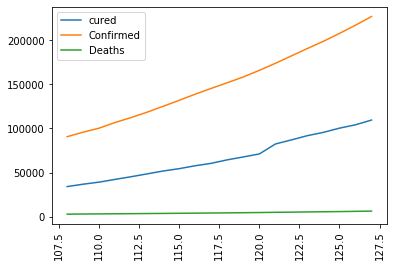

In [201]:
plot(df_given)

### Plot from last 20 days + predicted for 10 days

The indices on x axis indicates days (15-05-2020 to 15-06-2020)

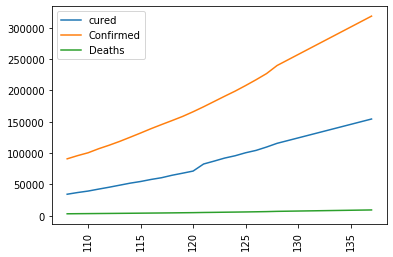

In [202]:
plot(df_given_and_pred)

## Individual Predictions

### Death 20 days + 10 days predict 

In [9]:
df_tot=pd.read_csv('obtained.csv',index_col=-1)

In [13]:
print(df_tot)

           Confirmed       Deaths          Cured
index                                           
0           1.000000     0.000000       0.000000
1           1.000000     0.000000       0.000000
2           2.000000     0.000000       0.000000
3           3.000000     0.000000       0.000000
4           3.000000     0.000000       0.000000
5           3.000000     0.000000       0.000000
6           3.000000     0.000000       0.000000
7           3.000000     0.000000       0.000000
8           3.000000     0.000000       0.000000
9           3.000000     0.000000       0.000000
10          3.000000     0.000000       0.000000
11          3.000000     0.000000       0.000000
12          3.000000     0.000000       0.000000
13          3.000000     0.000000       0.000000
14          3.000000     0.000000       0.000000
15          3.000000     0.000000       0.000000
16          3.000000     0.000000       0.000000
17          3.000000     0.000000       0.000000
18          3.000000

In [14]:
df_given_and_pred=df_tot[-30:]

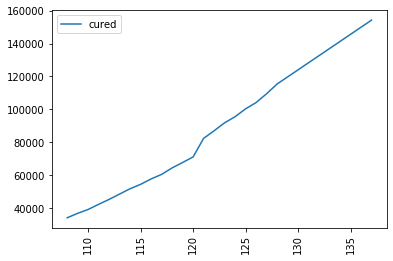

In [16]:
ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_given_and_pred.index, df_given_and_pred['Cured'], label="cured")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

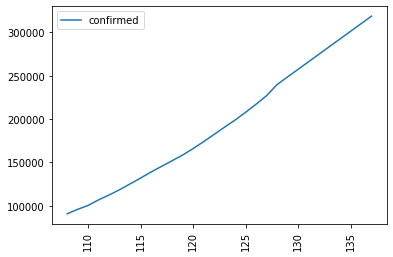

In [17]:
ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_given_and_pred.index, df_given_and_pred['Confirmed'], label="confirmed")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

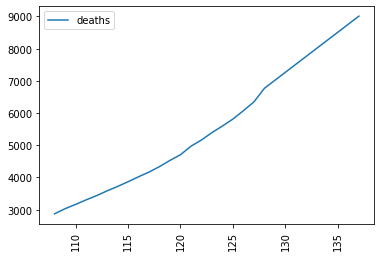

In [18]:
ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_given_and_pred.index, df_given_and_pred['Deaths'], label="deaths")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

### All Over


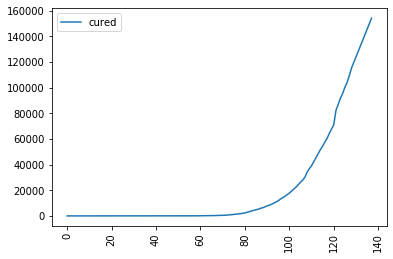

In [20]:
ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_tot.index, df_tot['Cured'], label="cured")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

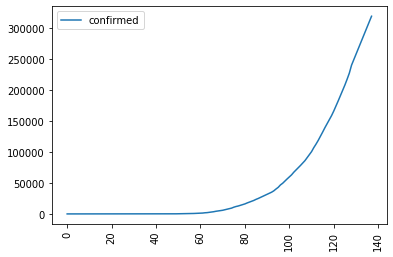

In [21]:
ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_tot.index, df_tot['Confirmed'], label="confirmed")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

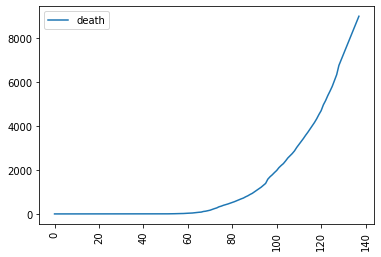

In [22]:
ax1=plt.subplot2grid((4,1), (0,0), rowspan=5, colspan=1)

ax1.plot(df_tot.index, df_tot['Deaths'], label="death")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()